In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns  
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
!pip install tensorflow

     -------------------------------------- 376.9/376.9 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 127.8/127.8 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 240.7/

In [4]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,21-09-2018,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,19-09-2018,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,18-09-2018,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,17-09-2018,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,14-09-2018,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [5]:
df1 = df.copy()
df1

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,27-07-2010,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [6]:
df.shape

(2035, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [12]:
df['Date']= pd.to_datetime(df['Date'])

In [13]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [14]:
#Checking for null values
def find_dirty_values(data):
    dtypes = pd.DataFrame(data.dtypes,columns=["Data Type"])
    dtypes["Unique Values"]=data.nunique().sort_values(ascending=True)
    dtypes["Null Values"]=data.isnull().sum()
    dtypes["% null Values"]=data.isnull().sum()/len(data)
    return dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [15]:
null_data = find_dirty_values(df)
null_data

,Data Type,Unique Values,Null Values,% null Values
Date,datetime64[ns],2035,0,0.000000
Open,float64,1165,0,0.000000
High,float64,1257,0,0.000000
Low,float64,1263,0,0.000000
Last,float64,1268,0,0.000000
Close,float64,1313,0,0.000000
Total Trade Quantity,int64,2034,0,0.000000
Turnover (Lacs),float64,2030,0,0.000000


<Axes: >

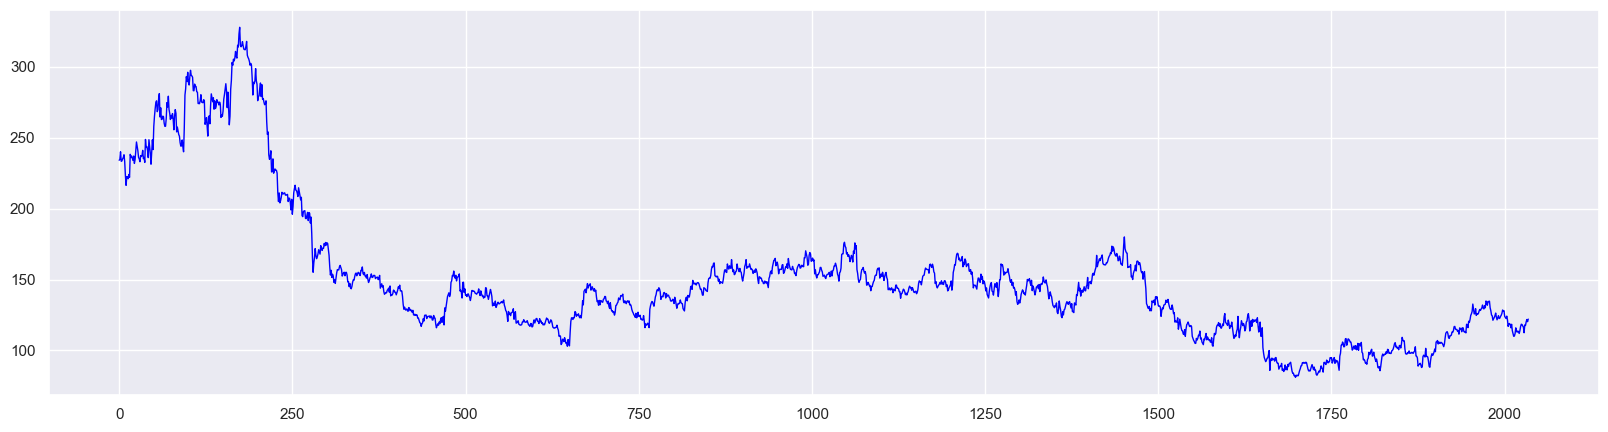

In [16]:
#Data Visualization
sns.set(rc = {'figure.figsize': (20, 5)})
df['Open'].plot(linewidth = 1,color='blue')

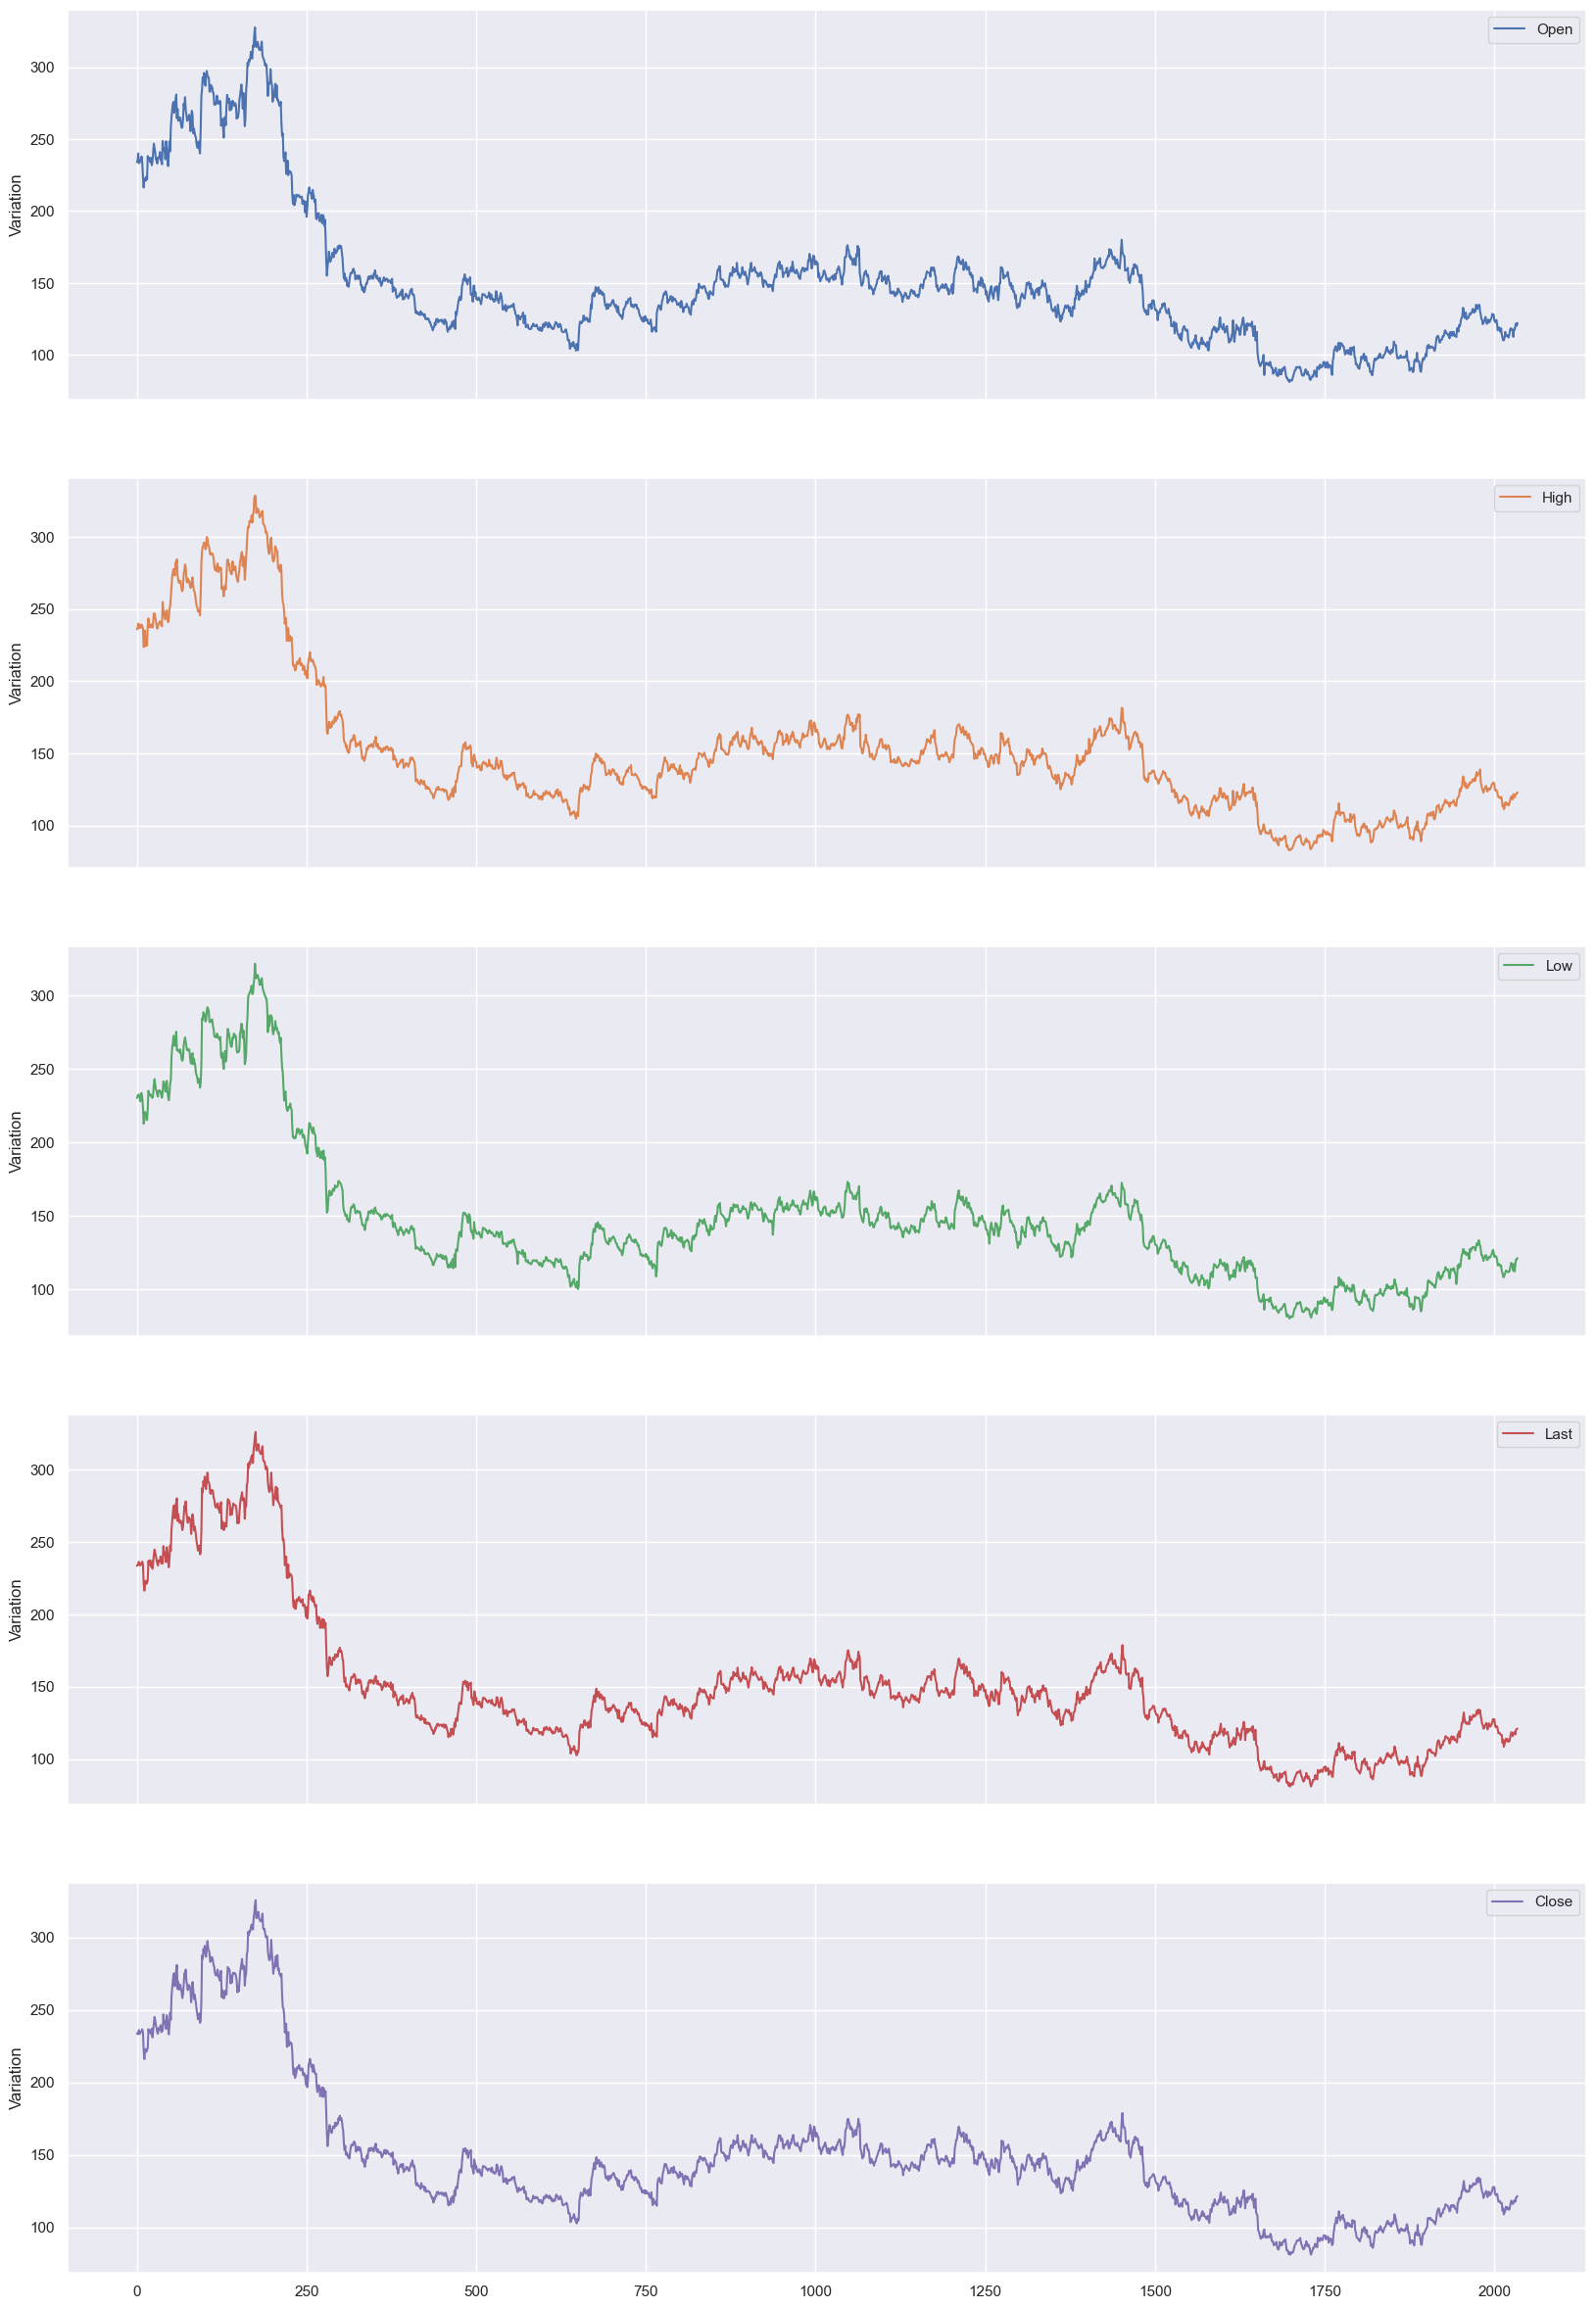

In [18]:
#checking out the price of stocks Open, High, Low and Close
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')

In [19]:
df.index=df['Date']
del df["Date"]
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


In [20]:
#7 days plot of the stock
df.rolling(7).mean().head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-19,235.200000,237.557143,231.135714,234.414286,234.307143,3.274848e+06,7652.388571
2018-09-18,235.750000,238.028571,231.607143,234.700000,234.492857,3.209831e+06,7509.724286
2018-09-17,235.550000,238.200000,231.485714,235.071429,234.971429,2.936693e+06,6879.075714


<Axes: xlabel='Date'>

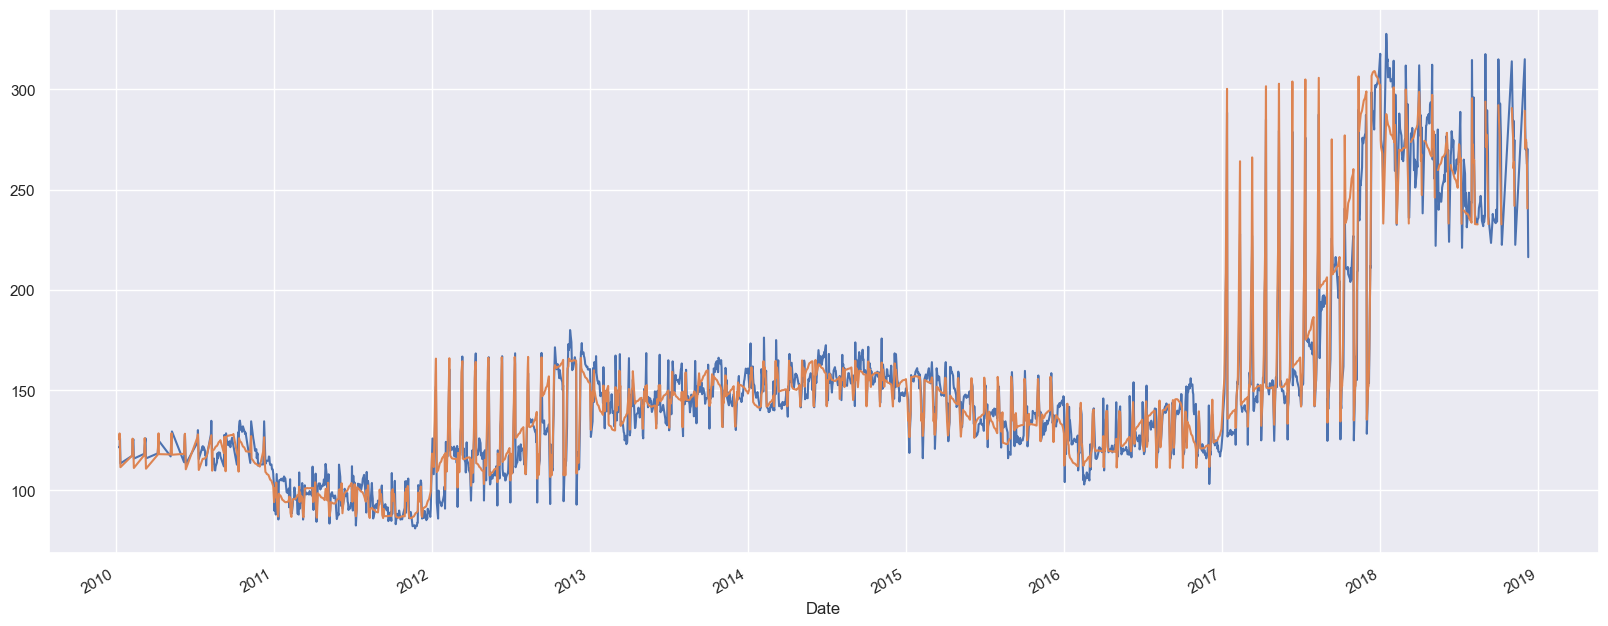

In [21]:
df['Open'].plot(figsize=(20,8),alpha = 1)
df.rolling(window=30).mean()['Close'].plot(alpha = 1)

<Axes: xlabel='Date'>

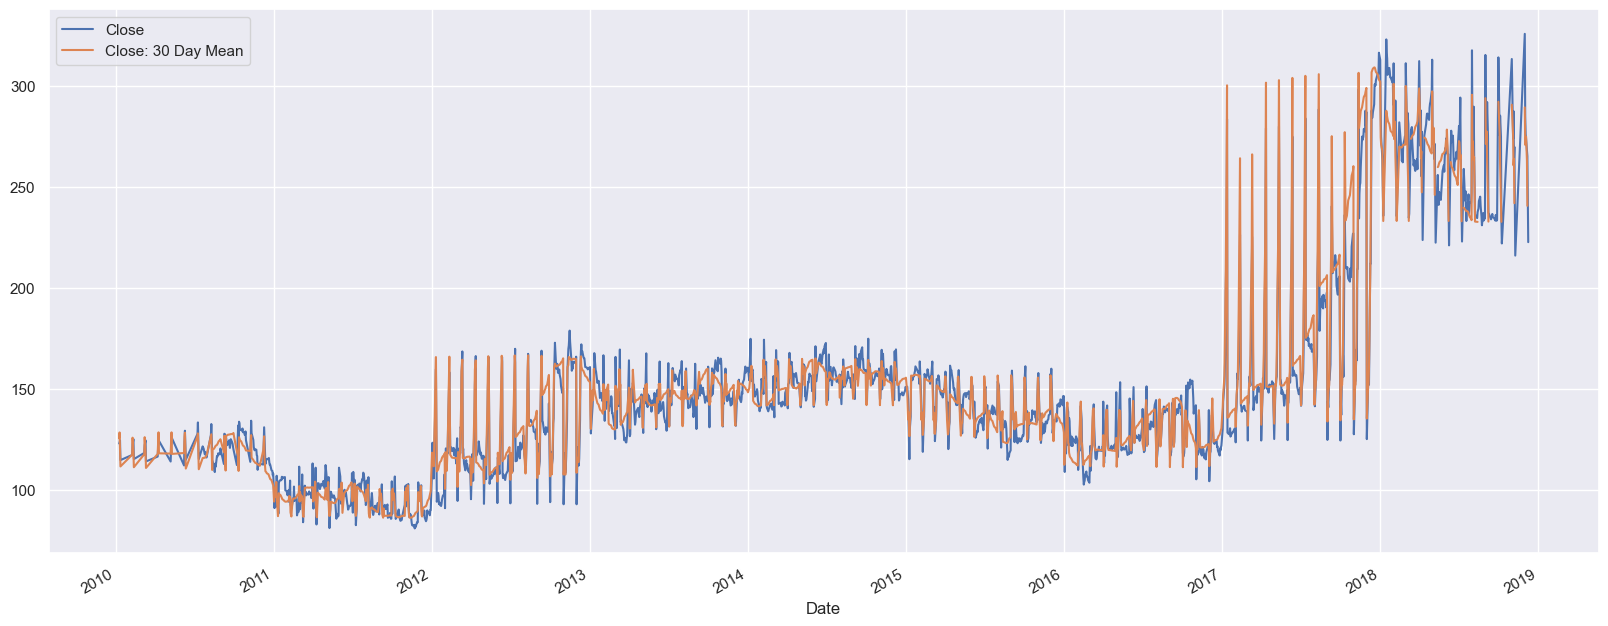

In [22]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(20,8),alpha = 1)

<Axes: xlabel='Date'>

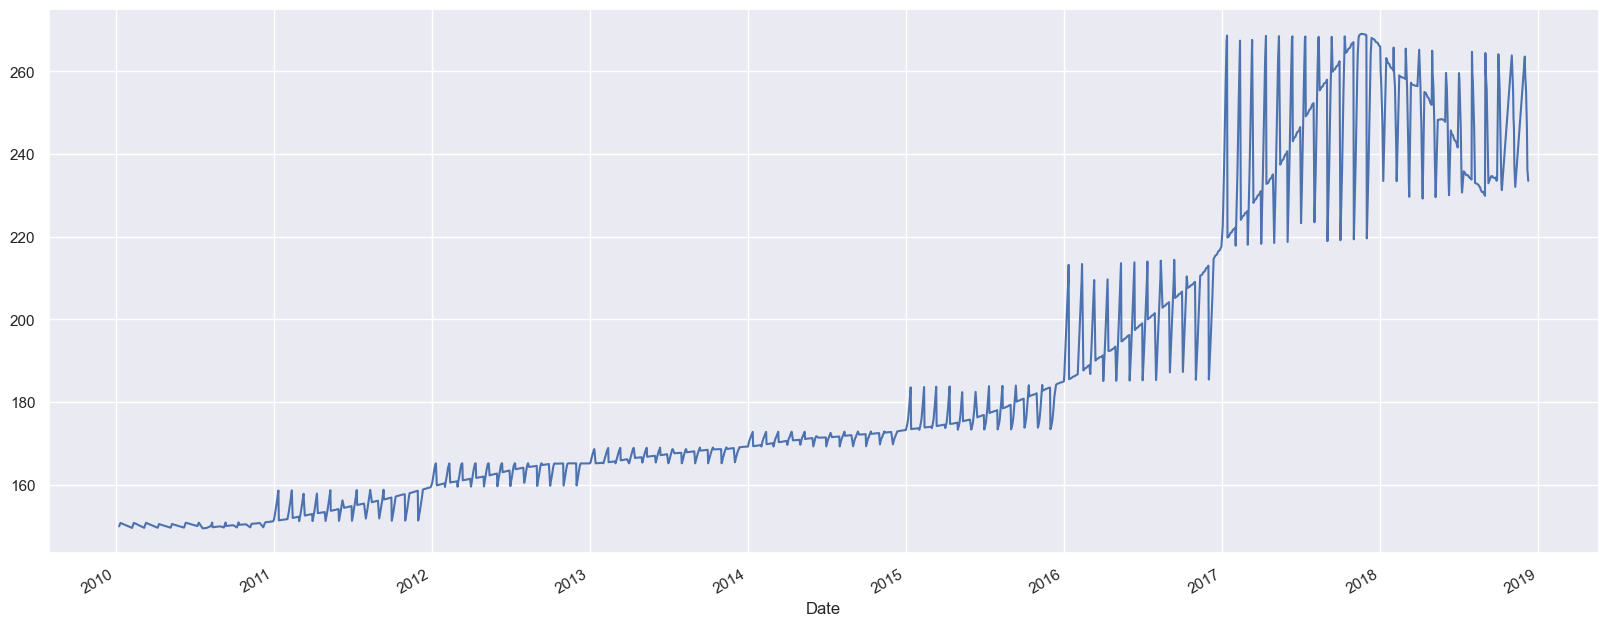

In [23]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(20,8),alpha = 1)

In [24]:
df2=df1.reset_index()['Open']
df2

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

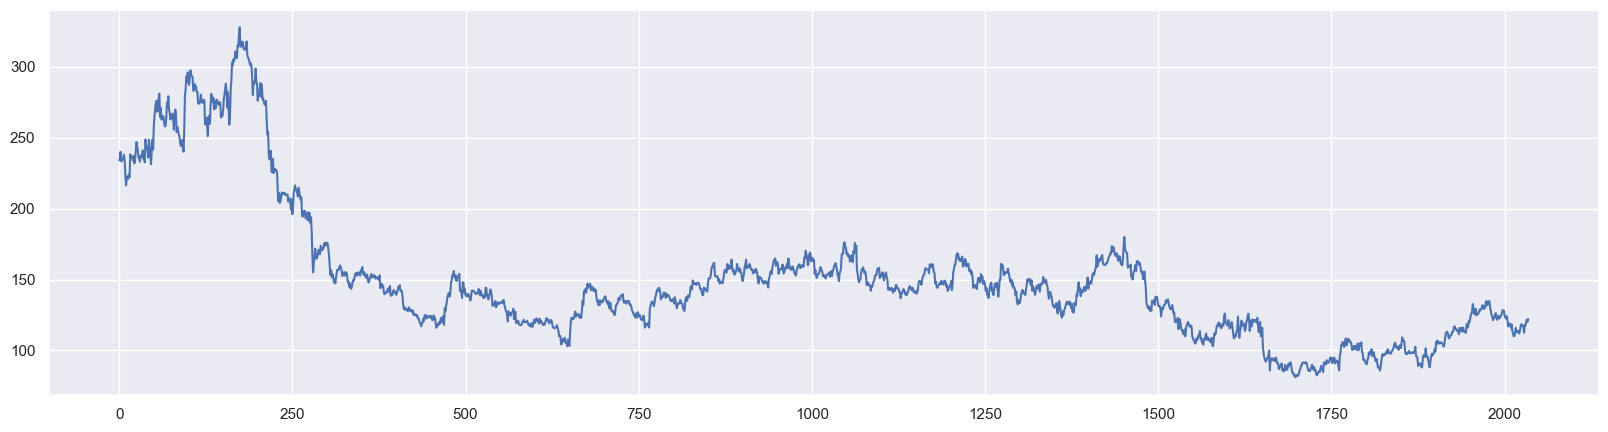

In [25]:
plt.plot(df2)

In [26]:
#applying MinMax scaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))
print(df2)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


In [27]:
#splitting dataset into train and test
train_size=int(len(df2)*0.75)
test_size=len(df2)-train_size
train_data,test_data=df2[0:train_size,:],df2[train_size:len(df2),:1]

In [28]:
train_data,test_data

(array([[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.18491484],
        [0.15774534],
        [0.16180049]]),
 array([[0.15774534],
        [0.15774534],
        [0.16991079],
        [0.13746959],
        [0.14963504],
        [0.16605839],
        [0.15369019],
        [0.14152474],
        [0.13341444],
        [0.13260341],
        [0.12368208],
        [0.12246553],
        [0.13625304],
        [0.11719384],
        [0.13746959],
        [0.15004055],
        [0.15308191],
        [0.15794809],
        [0.15186537],
        [0.14557989],
        [0.14497161],
        [0.14801298],
        [0.14476886],
        [0.11719384],
        [0.11151663],
        [0.10563666],
        [0.10218978],
        [0.09712084],
        [0.09691809],
        [0.11131387],
        [0.10644769],
        [0.11111111],
        [0.1202352 ],
        [0.11922141],
        [0.13219789],
        [0.10969181],
        [0.11232766],
        [0.10097324],
        [0.097120

In [29]:
print(f"Shape Of Training Data Set : ",train_data.shape)
print(f"Shape Of Testing Data Set :",test_data.shape)

Shape Of Training Data Set :  (1526, 1)
Shape Of Testing Data Set : (509, 1)


In [30]:
#converting array of values into dataset matrix
def create_dataset(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        train_X.append(a)
        train_Y.append(dataset[i + time_step, 0])
    return numpy.array(train_X), numpy.array(train_Y)

In [31]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [32]:
#Reshape input to be samples, time steps, features which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [33]:
print(f"Shape Of Training Data Set : ",X_train.shape)
print(f"Shape Of Testing Data Set :",X_test.shape)
print(f"Shape Of Train Label :",y_train.shape)
print(f"Shape Of Test Label :",y_test.shape)

Shape Of Training Data Set :  (1425, 100, 1)
Shape Of Testing Data Set : (408, 100, 1)
Shape Of Train Label : (1425,)
Shape Of Test Label : (408,)


In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

d:\Users\USER\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
#Model LSTM result
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - loss: 0.0363 - val_loss: 0.0057
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0032 - val_loss: 7.4646e-04
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0016 - val_loss: 9.7009e-04
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0013 - val_loss: 9.6609e-04
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0013 - val_loss: 8.8172e-04
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0011 - val_loss: 9.3930e-04
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 12/100
23/23 ━

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 4.3402e-04 - val_loss: 3.7478e-04
Epoch 65/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 3.8026e-04 - val_loss: 3.1556e-04
Epoch 66/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 3.4426e-04 - val_loss: 3.4137e-04
Epoch 67/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 3.1256e-04 - val_loss: 2.8054e-04
Epoch 68/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 2.9716e-04 - val_loss: 3.0086e-04
Epoch 69/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 3.4547e-04 - val_loss: 2.8966e-04
Epoch 70/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 3.0218e-04 - val_loss: 3.6123e-04
Epoch 71/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 2.8972e-04 - val_loss: 2.7577e-04
Epoch 72/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 2.7764e-04 - val_loss: 2.7540e-04
Epoch 73/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 3.3167e-04 - val_loss: 3.7523e-04
Epoch 74/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step

In [37]:
#Prediction and Performance 
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [38]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

165.38028142818754

In [39]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [40]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

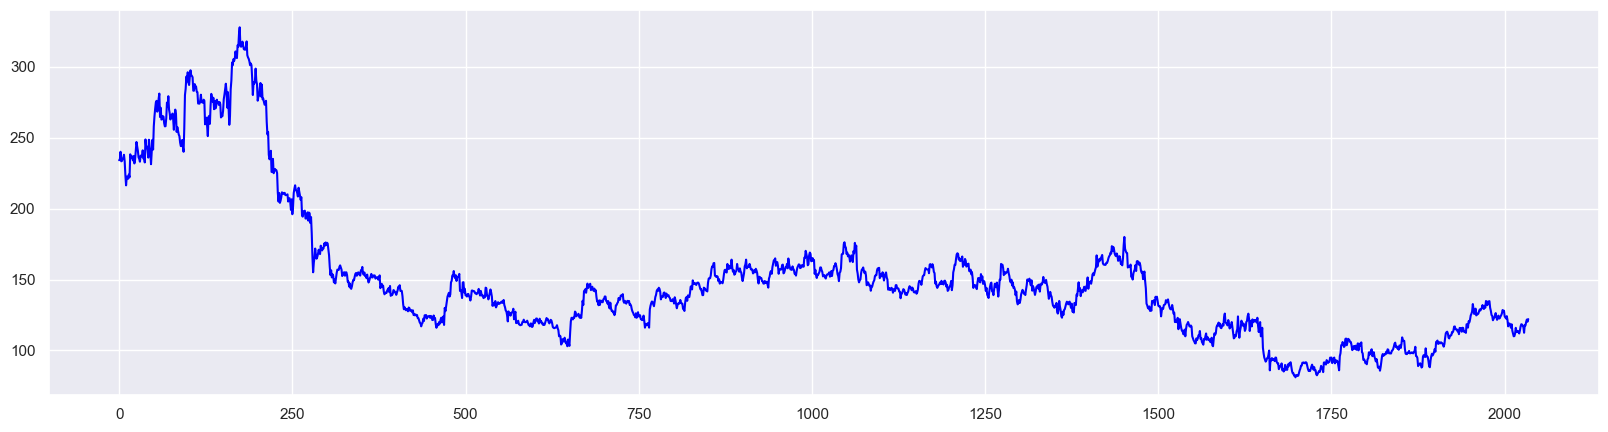

In [41]:
#plotting baseline and predictions
pred  = scaler.inverse_transform(df2)
plt.plot(pred,color='blue')
plt.show()

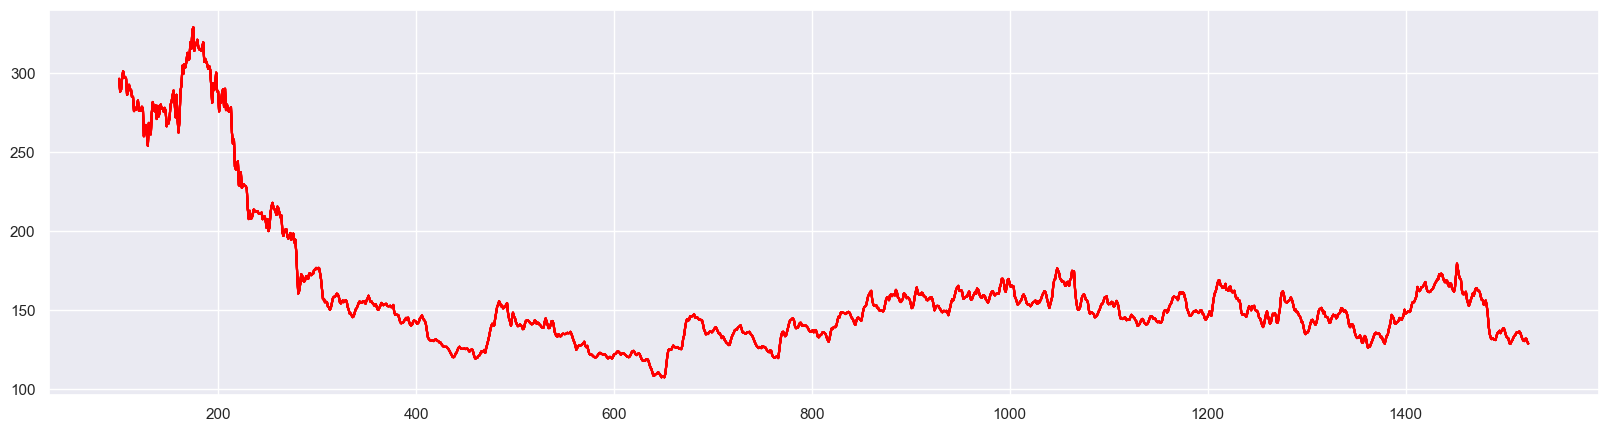

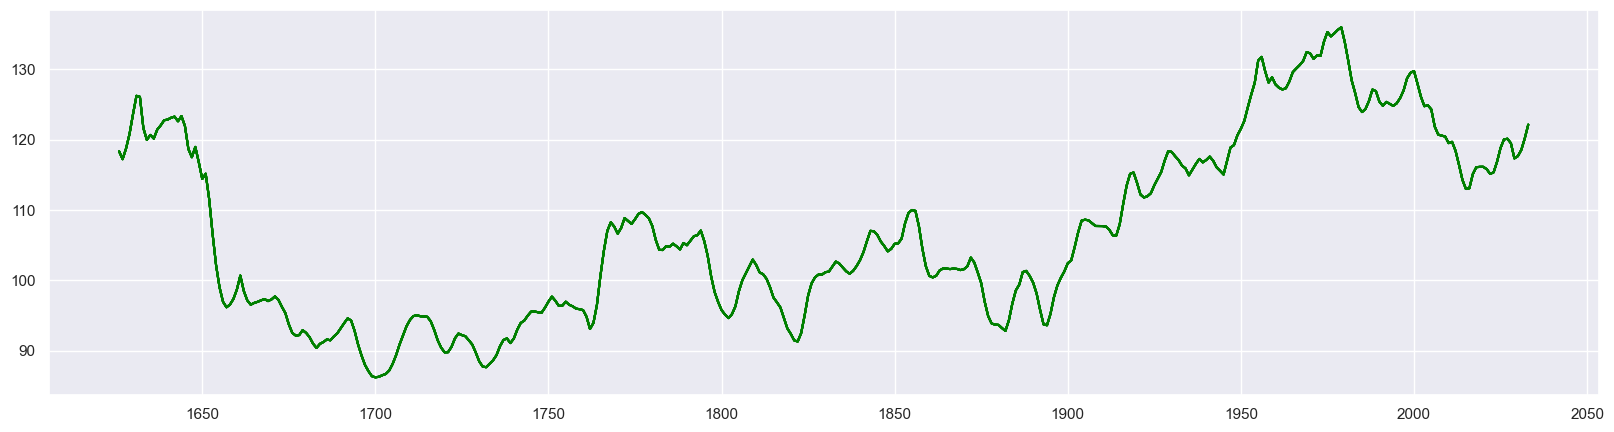

In [42]:
plt.plot(trainPredictPlot,color='red')
plt.show()
plt.plot(testPredictPlot,color='green')
plt.show()

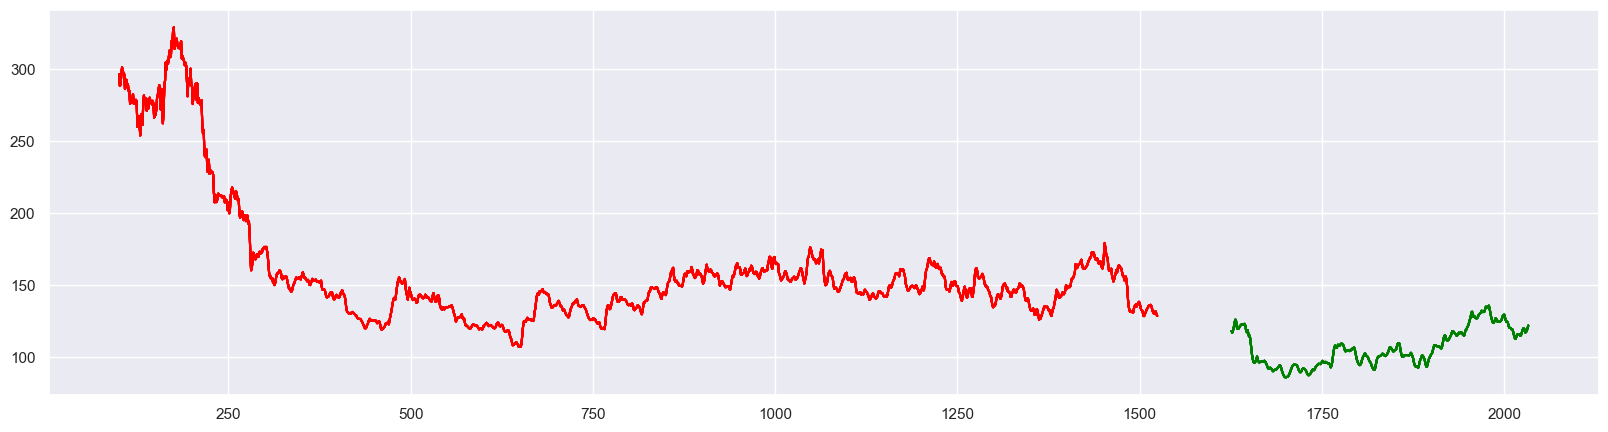

In [43]:
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

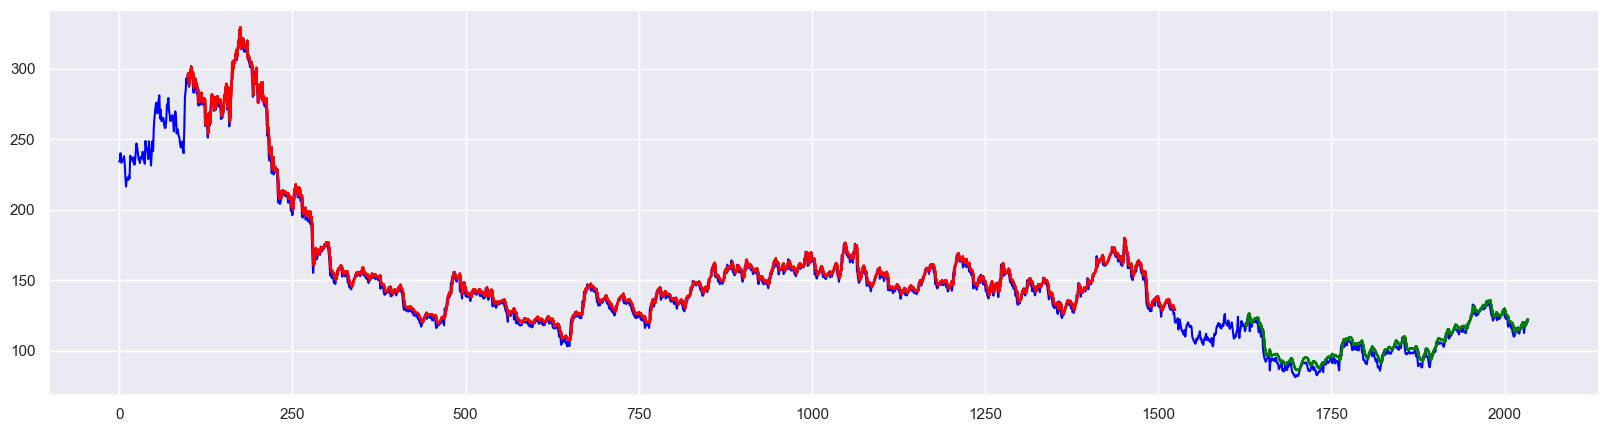

In [44]:
plt.plot(pred,color='blue')
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [45]:
len(test_data)

509

In [46]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 168)

In [47]:
#Saving Predicted model
model.save("stock_model.h5")